# Convert data set into R, G, and B arrays

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [1]:
# input     folder full of forhead images labelled numerically
# output:   three strings
def RGB_channels(frames_source):
   
    filelist = os.listdir(frames_source)
    filelist = sorted(filelist)
    
    R_avg = np.zeros(0, dtype = int) #zeros(len(filelist))
    G_avg = np.zeros(0, dtype = int)
    B_avg = np.zeros(0, dtype = int)

    for filename in filelist:
        if filename.endswith(".png"):
            path_image = os.path.join(frames_source, filename)
            imageRGB = io.imread(path_image)
            imageR = np.zeros(imageRGB.shape, dtype=int)
            imageG = np.zeros(imageRGB.shape, dtype=int)
            imageB = np.zeros(imageRGB.shape, dtype=int)
            imageR[:,:,0] = imageRGB[:,:,0]
            imageG[:,:,1] = imageRGB[:,:,1]
            imageB[:,:,2] = imageRGB[:,:,2]
            
            shape = np.shape(imageR)
            dim = shape[0]*shape[1]
            R_avg = np.append(R_avg, imageR.sum()/dim)
            G_avg = np.append(G_avg, imageG.sum()/dim)
            B_avg = np.append(B_avg, imageB.sum()/dim)
            
            if(filename == "1.png"):
                plt.figure(figsize=(15,6))
                plt.subplot(131) 
                plt.imshow(imageR)
                plt.title('Average red pixel of frame 1 is ' + str(int(R_avg[-1])))
                plt.subplot(132)
                plt.imshow(imageG)
                plt.title('Average green pixel of frame 1 is ' + str(int(G_avg[-1])))
                plt.subplot(133)
                plt.imshow(imageB)
                plt.title('Average blue pixel of frame 1 is ' + str(int(B_avg[-1])))
        
    return R_avg, G_avg, B_avg
            

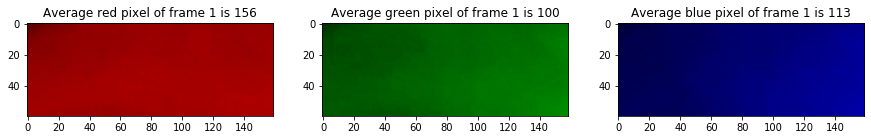

In [3]:
#fill this in with the video to be turned into a forehead video
#run this box
frames_source = "erickson_fps29.784"

Rs, Gs, Bs = RGB_channels(frames_source)

signal.size: 46


C:\Users\emmae\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


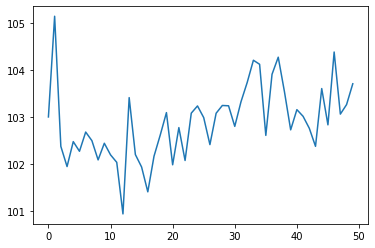

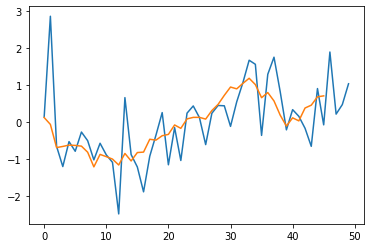

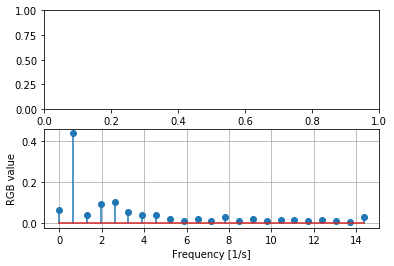

DFT size 46
idx 2
HR 5.217391304347826
frequency per sec 0.6521739130434783


In [77]:
def detrend(input_array):
    average = np.average(input_array)
    standard_deviation = np.std(input_array)
    subtract = np.subtract(input_array,average)
    detrended = subtract/standard_deviation
    return detrended

def moving_average(values,window):
    weights = np.repeat(1.0,window) / window
    smas = np.convolve(values,weights, 'valid')
    return smas

def highestPeak(signal, fft):
    frameRate = 30
    fourierFrequencies = np.fft.fftfreq(signal.size)
    frequency = fourierFrequencies[np.argmax(fft)] #gets frequency at the max index value of fft (1 per frame).
    idx = np.argmax(fft[2:])
    print("DFT size", fourierFrequencies.size)
    print("idx", idx)
    print("HR", (2+idx)/(signal.size/2) * 30 )
    frequencyPerSecond = frequency * frameRate
    print("frequency per sec", frequencyPerSecond)
    return frequencyPerSecond

def dft(signal): 
    #plt.plot(signal)
    frameRate = 30 #30 frames per second
    lengthOfVideo = 10
    fourierTransform = np.fft.rfft(signal) / signal.size
    print("signal.size:", signal.size)
    timePlot = np.arange(0, lengthOfVideo, 1 / frameRate); #used to graph signal
    values = np.arange(int(signal.size/2))
    timePeriod = signal.size / frameRate #makes the domain of the fourierTransform in seconds
    frequencies = values / timePeriod
    positiveFFT = np.abs(fourierTransform[0 : signal.size//2])
    figure, graph = plt.subplots(2, 1)
    graph[1].set_ylabel("RGB value")
    graph[1].set_xlabel("Frequency [1/s]")
    graph[1].stem(frequencies, positiveFFT)
    plt.grid()
    plt.show()
    highestPeak(signal, positiveFFT)
plt.figure()
plt.plot(Gs[100:150])
#plt.plot(Rs[100:400])
#plt.plot(Bs[100:400])
plt.figure()
Gs_detrended = detrend(Gs[100:150])
Gs_ma = moving_average(Gs_detrended, 5)
plt.plot(Gs_detrended)
plt.plot(Gs_ma)
dft(Gs_ma)